# Probe-fed patch antenna

This example demonstrates how the ``Stackup3D`` class
can be used
to create and analyze a patch antenna in HFSS.

Note that the HFSS 3D Layout interface may offer advantages for
laminate structures such as the patch antenna.

Keywords: **HFSS**, **terminal**, **antenna**., **patch**.

## Perform imports and define constants

Perform required imports.

## Prerequisites

### Perform imports

In [1]:
import os
import tempfile
import time

import ansys.aedt.core
from ansys.aedt.core.modeler.advanced_cad.stackup_3d import Stackup3D

### Define constants
Constants help ensure consistency and avoid repetition throughout the example.

In [2]:
AEDT_VERSION = "2025.2"
NUM_CORES = 4
NG_MODE = False  # Open AEDT UI when it is launched.

### Create temporary directory

Create a temporary working directory.
The name of the working folder is stored in ``temp_folder.name``.

> **Note:** The final cell in the notebook cleans up the temporary folder. If you want to
> retrieve the AEDT project and data, do so before executing the final cell in the notebook.

In [3]:
temp_folder = tempfile.TemporaryDirectory(suffix=".ansys")

### Launch HFSS

Create an instance of the ``Hfss`` class. The HFSS application will be launched.

In [4]:
project_name = os.path.join(temp_folder.name, "patch.aedt")
hfss = ansys.aedt.core.Hfss(
    project=project_name,
    solution_type="Terminal",
    design="patch",
    non_graphical=NG_MODE,
    new_desktop=True,
    version=AEDT_VERSION,
)

PyAEDT INFO: Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)].


PyAEDT INFO: PyAEDT version 0.25.dev0.


PyAEDT INFO: Initializing new Desktop session.


PyAEDT INFO: Log on console is enabled.


PyAEDT INFO: Log on file C:\Users\ansys\AppData\Local\Temp\pyaedt_ansys_fb876fbb-aede-400a-8435-ecfe80130747.log is enabled.


PyAEDT INFO: Log on AEDT is disabled.


PyAEDT INFO: Starting new AEDT gRPC session.


PyAEDT INFO: AEDT installation Path C:\Program Files\ANSYS Inc\v252\AnsysEM


PyAEDT INFO: Client application successfully started.


PyAEDT INFO: New AEDT gRPC session session started on port 50051.


PyAEDT INFO: 2025.2 version started with process ID 3080.


PyAEDT WARNING: Service Pack is not detected. PyAEDT is currently connecting in Insecure Mode.


PyAEDT WARNING: Please download and install latest Service Pack to use connect to AEDT in Secure Mode.


PyAEDT INFO: Debug logger is disabled. PyAEDT methods will not be logged.


PyAEDT INFO: Project patch has been created.


PyAEDT INFO: Added design 'patch' of type HFSS.


PyAEDT INFO: Aedt Objects correctly read


### Specify units
Length units can be applied to the modeler in HFSS. The default frequency units, howver, cannot be modified through the Python interface.

The variable ``freq_units`` can be used throughout this example to ensure that frequency assignments are consistent with the specified units.

In [5]:
length_units = "mm"
freq_units = "GHz"
hfss.modeler.model_units = length_units

PyAEDT INFO: Modeler class has been initialized! Elapsed time: 0m 1sec


### Create patch antenna

The patch antenna is comprised of a ground layer, the dielectric
substrate and a top signal layer where the patch antenna resides.

In [6]:
stackup = Stackup3D(hfss)
ground = stackup.add_ground_layer(
    "ground", material="copper", thickness=0.035, fill_material="air"
)
dielectric = stackup.add_dielectric_layer(
    "dielectric", thickness="0.5" + length_units, material="Duroid (tm)"
)
signal = stackup.add_signal_layer(
    "signal", material="copper", thickness=0.035, fill_material="air"
)
patch = signal.add_patch(
    patch_length=9.57, patch_width=9.25, patch_name="Patch", frequency=1e10
)

stackup.resize_around_element(patch)
pad_length = [3, 3, 3, 3, 3, 3]  # Air bounding box buffer in mm.
region = hfss.modeler.create_region(pad_length, is_percentage=False)
hfss.assign_radiation_boundary_to_objects(region)

patch.create_probe_port(ground, rel_x_offset=0.485)

PyAEDT INFO: Materials class has been initialized! Elapsed time: 0m 0sec


PyAEDT WARNING: The closer the ratio between wave length and the width is to 1, the less correct the impedance calculation is


PyAEDT INFO: Boundary Radiation Rad__9M8Y71 has been created.


PyAEDT INFO: Boundary Perfect E Probe_PEC has been created.


PyAEDT INFO: Boundary AutoIdentify Probe_Port has been created.


### Patch antenna model
<img src="_static/patch.svg" width="500">
The patch antenna model should look similar to this image. The length, width
and probe x-offset are shown in the image.

### Define solution setup
The solution setup specifies details used to run
the finite element analysis in HFSS. The following specifies that adaptive refinement occur at 10 GHz while all other settings are set to
default values. 

The frequency sweep is used to specify the range over which scattering
parameters will be calculated.

In [7]:
setup = hfss.create_setup(name="Setup1", setup_type="HFSSDriven", Frequency="10GHz")

setup.create_frequency_sweep(
    unit="GHz",
    name="Sweep1",
    start_frequency=8,
    stop_frequency=12,
    sweep_type="Interpolating",
)

hfss.save_project()  # Save the project.

PyAEDT INFO: Parsing C:\Users\ansys\AppData\Local\Temp\tmpv3yeh66h.ansys\patch.aedt.


PyAEDT INFO: File C:\Users\ansys\AppData\Local\Temp\tmpv3yeh66h.ansys\patch.aedt correctly loaded. Elapsed time: 0m 0sec


PyAEDT INFO: aedt file load time 0.015692472457885742


PyAEDT INFO: Linear count sweep Sweep1 has been correctly created


PyAEDT INFO: Project patch Saved correctly


True

The `hfss` instance allows you to query or modify nearly all 
properties of the HFSS design. Here is a simple example demonstrating how to query
information from the ``hfss`` instance.

In [8]:
message = "We have created a patch antenna"
message += "using PyAEDT.\n\nThe project file is "
message += f"located at \n'{hfss.project_file}'.\n"
message += f"\nThe HFSS design is named '{hfss.design_name}'\n"
message += f"and is comprised of "
message += f"{len(hfss.modeler.objects)} objects whose names are:\n\n"
message += "".join([f"- '{o.name}'\n" for _, o in hfss.modeler.objects.items()])
print(message)

We have created a patch antennausing PyAEDT.

The project file is located at 
'C:\Users\ansys\AppData\Local\Temp\tmpv3yeh66h.ansys\patch.aedt'.

The HFSS design is named 'patch'
and is comprised of 9 objects whose names are:

- 'ground'
- 'dielectric'
- 'signal'
- 'Patch'
- 'Region'
- 'Probe'
- 'Probe_feed_wire'
- 'Probe_feed_outer'
- 'Probe_feed_outer_ObjectFromFace1'



Try using the Python ``dir()`` and ``help()`` methods to learn more about PyAEDT.

### Run analysis

The following command runs the EM analysis in HFSS.

In [9]:
hfss.analyze(cores=NUM_CORES)

PyAEDT INFO: Project patch Saved correctly


PyAEDT INFO: Key Desktop/ActiveDSOConfigurations/HFSS correctly changed.


PyAEDT INFO: Solving all design setups. Analysis started...


PyAEDT INFO: Design setup None solved correctly in 0.0h 1.0m 2.0s


PyAEDT INFO: Key Desktop/ActiveDSOConfigurations/HFSS correctly changed.


True

## Postprocessing

### Plot the return loss

PyAEDT INFO: Parsing C:\Users\ansys\AppData\Local\Temp\tmpv3yeh66h.ansys\patch.aedt.


PyAEDT INFO: File C:\Users\ansys\AppData\Local\Temp\tmpv3yeh66h.ansys\patch.aedt correctly loaded. Elapsed time: 0m 0sec


PyAEDT INFO: aedt file load time 0.03374743461608887


PyAEDT INFO: PostProcessor class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: PostProcessor class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: Post class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: Solution Data Correctly Loaded.


Time to initialize solution data:0.06382322311401367
Time to initialize solution data:0.07976293563842773


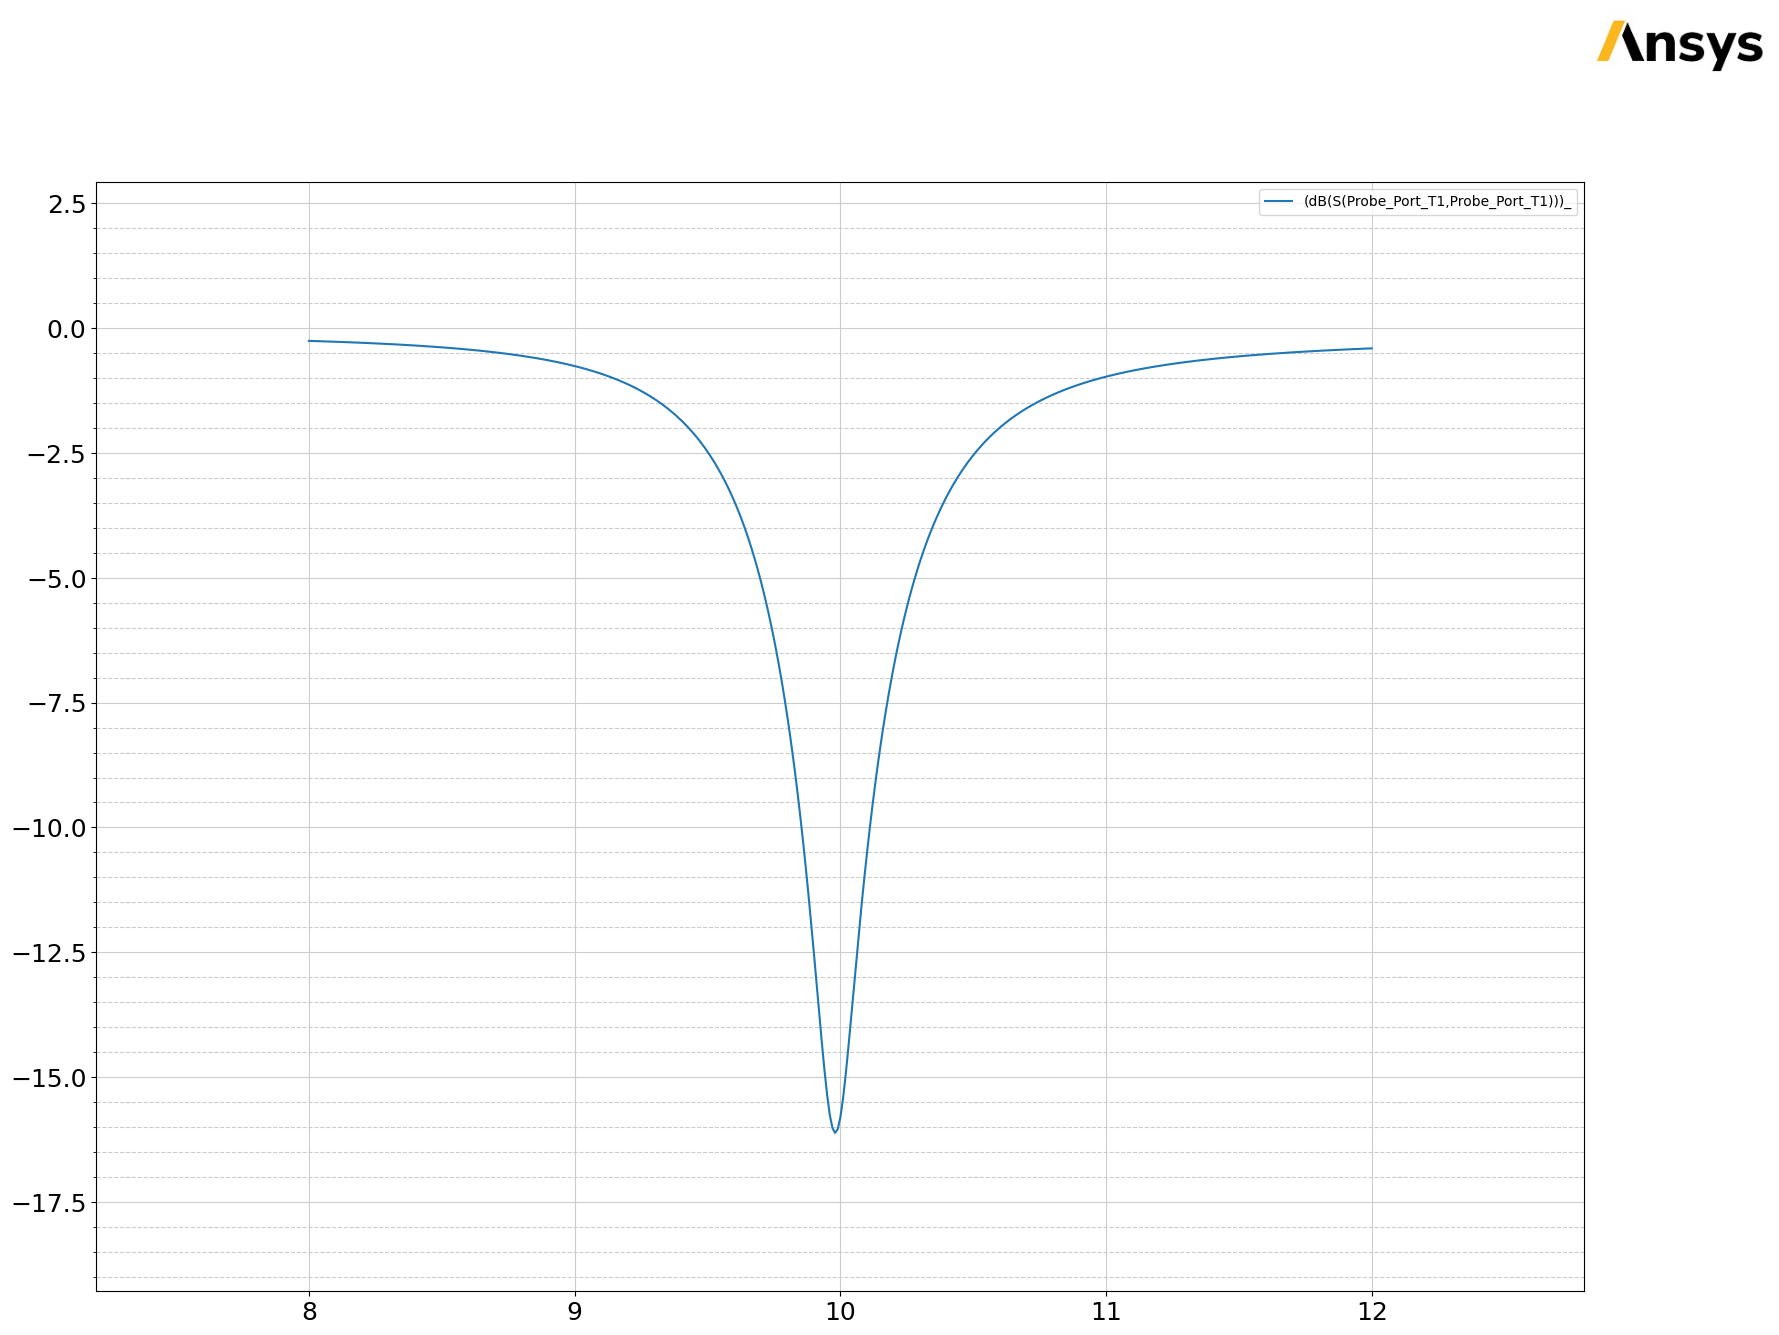

In [10]:
plot_data = hfss.get_traces_for_plot()
report = hfss.post.create_report(plot_data)
solution = report.get_solution_data()
plt = solution.plot(solution.expressions)

## Finish

### Save the project

In [11]:
hfss.save_project()
hfss.release_desktop()
# Wait 3 seconds to allow AEDT to shut down before cleaning the temporary directory.
time.sleep(3)

PyAEDT INFO: Project patch Saved correctly


PyAEDT INFO: Desktop has been released and closed.


### Clean up

All project files are saved in the folder ``temp_folder.name``.
If you've run this example as a Jupyter notebook, you
can retrieve those project files. The following cell removes
all temporary files, including the project folder.

In [12]:
temp_folder.cleanup()